# Classification of high profit product - Features Creation

Usable details in Table of Transactions:
- List price: is the cost of good sold (COGS)
- Standard cost: is the cost of goods manufactured (COGM) 

The aim is to classify whether a product is considered as 'High', 'Average' or 'Low' based on it's profit margin, therefore certain calculation are needed:
- Gross Profit: gross_profit = List price - Standard cost
- Margin Percentage: Bike's margin = gross profit / list price * 100%
- Markup Percentage: Bike's markup = gross profit / standard cost * 100%

After getting required calculation, the result of classification should be:
- High profit: 48% Above
- Low profit: Below 48%

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math, subprocess
import datetime as dt

In [15]:
df = pd.read_csv('product margin.csv')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015


Gross Profit

In [16]:
df['gross_profit'] = df.list_price - df.standard_cost
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,17.87
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,1702.55
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,1544.61
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,817.36
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,1055.82


In [17]:
df['margin_percentage'] = df.gross_profit / df.list_price * 100
df['margin_percentage'] = np.around(df['margin_percentage'],2)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,17.87,25.00
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,1702.55,81.40
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,1544.61,86.13
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,817.36,68.20
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,1055.82,59.81


In [18]:
df['markup_percentage'] = df.gross_profit / df.standard_cost * 100
df['markup_percentage'] = np.around(df['markup_percentage'],2)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,17.87,25.00,33.33
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,1702.55,81.40,437.76
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,1544.61,86.13,620.77
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,817.36,68.20,214.47
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,1055.82,59.81,148.82


Product Margin Classification 

In [19]:
#the high profit margin for bike retail industry is considered as 48% above in bicycle retail store. 
#Therefore, >=48% is considered as high profit, 33-47% as average, below 33% is low profit
def get_status(df):
    if df['margin_percentage'] < 48 :
        return 0
    else:
        return 1

df['high_profit_product'] = df.apply(get_status, axis = 1)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage,high_profit_product
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,02/12/2012,17.87,25.00,33.33,0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,03/03/2014,1702.55,81.40,437.76,1
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,20/07/1999,1544.61,86.13,620.77,1
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,16/12/1998,817.36,68.20,214.47,1
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,10/08/2015,1055.82,59.81,148.82,1


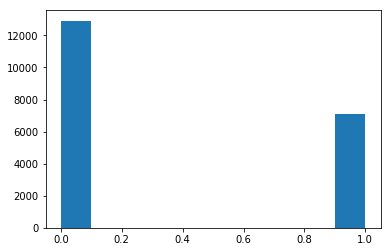

In [20]:
bar = list(df.high_profit_product)
plt.hist(bar)#build histogram and bins
plt.show()

In [21]:
compare = df.groupby(['high_profit_product'])['transaction_id'].agg('count')
compare = compare.reset_index()
compare

,high_profit_product,transaction_id
0,0,12916
1,1,7084


In [22]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors='coerce')
df['product_first_sold_date'] = pd.to_datetime(df['product_first_sold_date'], errors='coerce')
df = df.dropna()
df = df.set_index('transaction_id')
df.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage,high_profit_product
transaction_id,,,,,,,,,,,,,,,,
1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-02-12,17.87,25.00,33.33,0
2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55,81.40,437.76,1
3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61,86.13,620.77,1
4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36,68.20,214.47,1
5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-10-08,1055.82,59.81,148.82,1


### Converting features to binary:

In [23]:
df = pd.get_dummies(data=df,
                    columns=['online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size'],
                    prefix=['online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size'])
df.head()

,product_id,customer_id,transaction_date,list_price,standard_cost,product_first_sold_date,gross_profit,margin_percentage,markup_percentage,high_profit_product,...,product_line_Mountain,product_line_Road,product_line_Standard,product_line_Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small
transaction_id,,,,,,,,,,,,,,,,,,,,,
1,2,2950,2017-02-25,71.49,53.62,2012-02-12,17.87,25.00,33.33,0,...,0,0,1,0,0,0,1,0,1,0
2,3,3120,2017-05-21,2091.47,388.92,2014-03-03,1702.55,81.40,437.76,1,...,0,0,1,0,0,0,1,1,0,0
3,37,402,2017-10-16,1793.43,248.82,1999-07-20,1544.61,86.13,620.77,1,...,0,0,1,0,0,1,0,0,1,0
4,88,3135,2017-08-31,1198.46,381.10,1998-12-16,817.36,68.20,214.47,1,...,0,0,1,0,0,0,1,0,1,0
5,78,787,2017-01-10,1765.30,709.48,2015-10-08,1055.82,59.81,148.82,1,...,0,0,1,0,0,0,1,1,0,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 1 to 20000
Data columns (total 30 columns):
product_id                 19803 non-null int64
customer_id                19803 non-null int64
transaction_date           19803 non-null datetime64[ns]
list_price                 19803 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
gross_profit               19803 non-null float64
margin_percentage          19803 non-null float64
markup_percentage          19803 non-null float64
high_profit_product        19803 non-null int64
online_order_False         19803 non-null uint8
online_order_True          19803 non-null uint8
order_status_Approved      19803 non-null uint8
order_status_Cancelled     19803 non-null uint8
brand_Giant Bicycles       19803 non-null uint8
brand_Norco Bicycles       19803 non-null uint8
brand_OHM Cycles           19803 non-null uint8
brand_Solex                19803 non-null uint8

In [25]:
#df.to_csv('features_engineering.csv')